In [1]:
import os
# os.environ['HF_ENDPOINT'] = 'https://hf-mirror.com'
from datasets import load_dataset
import datasets
from huggingface_hub import snapshot_download
import json
from PIL import Image
from tqdm import tqdm

In [2]:
config = datasets.DownloadConfig(resume_download=True, max_retries=100)
# ds = load_dataset("UCSC-VLAA/MedTrinity-25M", "25M_demo", cache_dir="/data/home/rongxu.cui/crx/Qwen2.5-VL/med", 
#                   token=True,
#                   download_config=config
#                 )
ds = load_dataset('/data/home/rongxu.cui/crx/Qwen2.5-VL/med')

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

In [3]:
print(ds['train'])

Dataset({
    features: ['image', 'id', 'caption'],
    num_rows: 161630
})


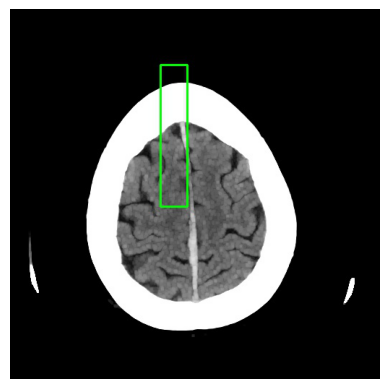

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

image = ds['train'][0]['image']  # 获取第一张图像

plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [ ]:
def save_images_and_json(ds, output_dir="mllm_data"):
    """
    将数据集中的图像和对应的 JSON 信息保存到指定目录。

    参数:
    ds: 数据集对象，包含图像和标题。
    output_dir: 输出目录，默认为 "mllm_data"。
    """
    # 创建输出目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 创建一个列表来存储所有的消息和图像信息
    all_data = []

    # 遍历数据集中的每个项目
    for item in tqdm(ds, desc='Processing images', unit='image'):
        img_path = f"{output_dir}/{item['id']}.jpg"  # 图像保存路径
        image = item["image"]  # 假设这里是一个 PIL 图像对象

        # 将图像对象保存为文件
        image.save(img_path)  # 使用 PIL 的 save 方法

        # 添加消息和图像信息到列表中
        all_data.append(
            {
   
                "messages": [
                    {
   
                        "content": "<image>图片中的诊断结果是怎样?",
                        "role": "user",
                    },
                    {
   
                        "content": item["caption"],  # 从数据集中获取的标题
                        "role": "assistant",
                    },
                ],
                "images": [img_path],  # 图像文件路径
            }
        )

    # 创建 JSON 文件
    json_file_path = f"{output_dir}/mllm_data.json"
    with open(json_file_path, "w", encoding='utf-8') as f:
        json.dump(all_data, f, ensure_ascii=False)  # 确保中文字符正常显示

In [7]:
save_images_and_json(ds['train'])

In [4]:
def mini_dataset(output_dir="mllm_data", data_num=20000):
    with open(f"{output_dir}/mllm_data.json", 'r', encoding='utf-8') as file:
        all_data = json.load(file)
    mini_data = all_data[:20000]
    json_file_path = f"{output_dir}/mllm_data_{data_num}.json"
    with open(json_file_path, "w", encoding='utf-8') as f:
        json.dump(mini_data, f, ensure_ascii=False)  # 确保中文字符正常显示

In [5]:
mini_dataset()